In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import filters
import cv2 as cv
from PIL import Image, ImageDraw
from math import sqrt
from sklearn.model_selection import train_test_split

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
box_kernel = np.array([[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]])


box_kernel2 = np.array([[0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9]])
              

# Gaussian kernel
gaussian_kernel = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])

In [3]:
def convol(image, kernel):


    # Select kernel here:
    kernel = kernel

    # Middle of the kernel
    offset = len(kernel) // 2

    # Create output image
    output_image = np.zeros(np.shape(image))
    # draw = ImageDraw.Draw(output_image)

    # Compute convolution between intensity and kernels
    for x in range(offset, input_image.width - offset):
        for y in range(offset, input_image.height - offset):
            acc = [0, 0, 0]
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = x + a - offset
                    yn = y + b - offset
                    input_pixels=[]
                    pixel = input_pixels[xn, yn]
                    acc[0] += pixel[0] * kernel[a][b]
                    acc[1] += pixel[1] * kernel[a][b]
                    acc[2] += pixel[2] * kernel[a][b]

            draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

    
        
    
    return output_image

In [3]:
def load_az_dataset(datasetPath):
    # Initialize the list of data and labels
    
    data = []
    labels = []
    # Loop over the rows of the A-Z handwritten digit dataset
    for row in open(datasetPath):
        # Parse the label and image from the row
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        # Images are represented as single channel (grayscale) images that are 28x28=784 pixels
        # -- we need to take this flattened 784-d list of numbers and reshape them into a 28x28 matrix
        image = image.reshape((28, 28))
        # Update the list of data and labels
        data.append(image)
        labels.append(label)
    # Convert the data and labels to NumPy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    # Return a 2-tuple of the A-Z data and labels
    return data, labels

In [4]:
data, labels = load_az_dataset('a_z_handwritten_data.csv')
idx = np.random.permutation(len(data))
x,y = data[idx], labels[idx]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)

In [21]:
print(y_train.shape)


(249542,)


NameError: name 'tf' is not defined

In [6]:
class_names = ['A', 'B', 'C', 'D', 'E',
               'F', 'G', 'H', 'I', 'J',
              'K', 'L', 'M', 'N', 'O', 'P',
              'Q', 'R', 'S', 'T', 'U', 'V',
              'W', 'X', 'Y', 'Z']

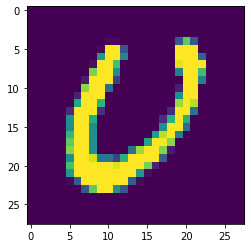

In [146]:
plt.imshow(X_test[0], interpolation='nearest')
plt.show()

In [147]:
y_test[0]

20

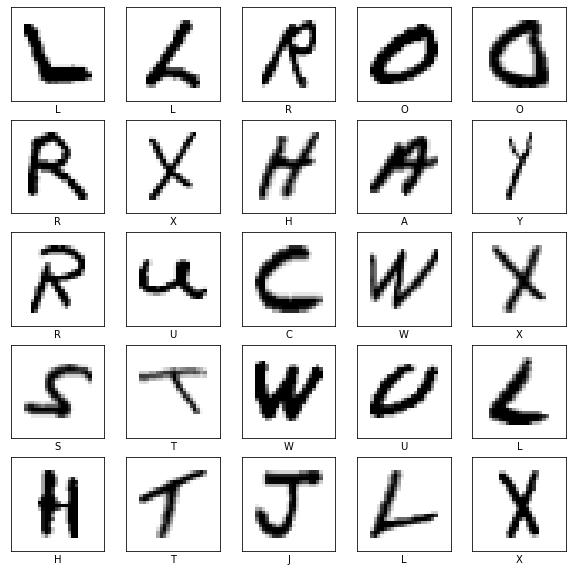

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [60]:
import tensorflow
import keras
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import

In [12]:
X_train.shape

(249542, 28, 28)

In [13]:
X_test.shape

(122909, 28, 28)

In [8]:
X_train = X_train.reshape(249542, 28, 28, 1)
X_test = X_test.reshape(122909, 28, 28, 1)


In [9]:
y_tr = tensorflow.one_hot(y_train, 26)
y_ts = tensorflow.one_hot(y_test, 26)

In [30]:
print(y_ts)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(122909, 26), dtype=float32)


In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [154]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
model.fit(X_train, y_tr, epochs=10, validation_data=(X_test, y_ts))

Epoch 1/10
7799/7799 [==============================] - 25s 3ms/step - loss: 0.3183 - accuracy: 0.9386 - val_loss: 0.1209 - val_accuracy: 0.9669
Epoch 2/10
7799/7799 [==============================] - 22s 3ms/step - loss: 0.1037 - accuracy: 0.9713 - val_loss: 0.1123 - val_accuracy: 0.9720
Epoch 3/10
7799/7799 [==============================] - 22s 3ms/step - loss: 0.0849 - accuracy: 0.9763 - val_loss: 0.1012 - val_accuracy: 0.9746
Epoch 4/10
7799/7799 [==============================] - 23s 3ms/step - loss: 0.0728 - accuracy: 0.9797 - val_loss: 0.1029 - val_accuracy: 0.9764
Epoch 5/10
7799/7799 [==============================] - 23s 3ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.1185 - val_accuracy: 0.9742
Epoch 6/10
7799/7799 [==============================] - 23s 3ms/step - loss: 0.0606 - accuracy: 0.9838 - val_loss: 0.1119 - val_accuracy: 0.9761
Epoch 7/10
7799/7799 [==============================] - 23s 3ms/step - loss: 0.0560 - accuracy: 0.9852 - val_loss: 0.1242 - val_ac

In [12]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.318302,0.938587,0.120946,0.966870
1,0.103660,0.971283,0.112340,0.971971
2,0.084925,0.976309,0.101197,0.974550
3,0.072761,0.979747,0.102914,0.976373
4,0.064355,0.982352,0.118476,0.974200


<AxesSubplot:>

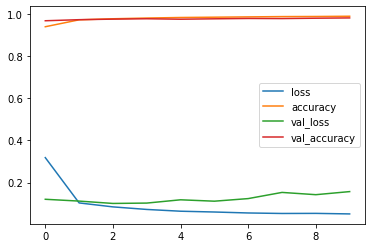

In [13]:
metrics.plot()

<AxesSubplot:>

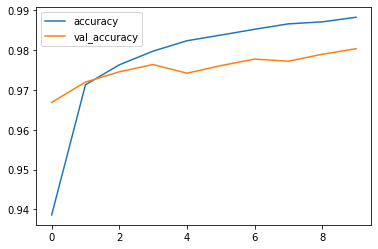

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

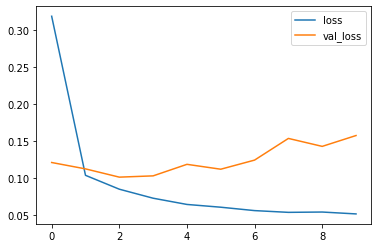

In [15]:
metrics[['loss','val_loss']].plot()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
predictions2 = np.argmax(model.predict(X_test), axis=-1)

In [163]:
y_test.shape

(122909,)

In [164]:
y_test[0]

20

In [165]:
predictions[0]

20

In [20]:
print(classification_report(y_test,predictions))
# support = nb element de chaque classe
# recall = 
# f1-score = rapport entre faux positif et 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4585
           1       0.98      0.95      0.96      2878
           2       0.98      0.99      0.98      7763
           3       0.96      0.91      0.94      3413
           4       0.99      0.97      0.98      3813
           5       0.98      0.97      0.97       397
           6       0.94      0.97      0.96      1950
           7       0.93      0.96      0.94      2424
           8       0.99      0.99      0.99       358
           9       0.96      0.97      0.96      2788
          10       0.96      0.96      0.96      1865
          11       0.98      0.99      0.98      3920
          12       0.99      0.98      0.98      3971
          13       0.98      0.98      0.98      6263
          14       0.98      1.00      0.99     18968
          15       0.99      0.99      0.99      6397
          16       0.95      0.96      0.95      1897
          17       0.99    

<AxesSubplot:>

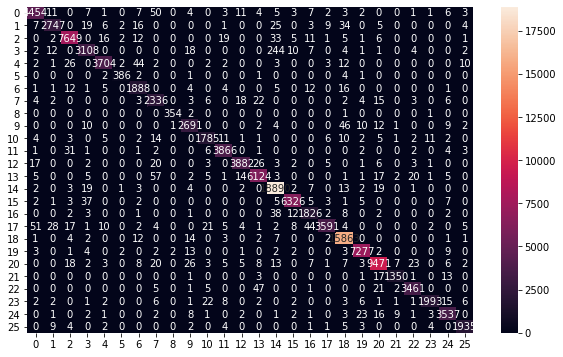

In [83]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='g')

In [33]:
letter_to_predict = X_test[0]

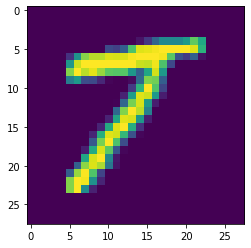

In [34]:
plt.imshow(letter_to_predict.reshape(28,28))

In [35]:
val = model.predict_classes(letter_to_predict.reshape(1,28,28,1))
class_names[val[0]]

'T'

In [188]:
print(letter_to_predict)

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [39]:
letter_to_predict2 = X_test[77]
print(letter_to_predict2.shape)
val = model.predict_classes(letter_to_predict2.reshape(1,28,28,1))
class_names[val[0]]

(28, 28, 1)


'Z'

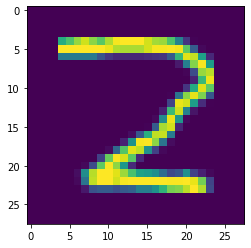

In [37]:
plt.imshow(X_test[77])

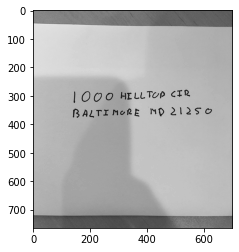

In [177]:
input_image = cv.imread("umbc_address.png")
imgray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)
#ret,imgray = cv.threshold(imgray,140,255,cv.THRESH_BINARY)
plt.imshow(imgray, cmap='gray') 
plt.show()  

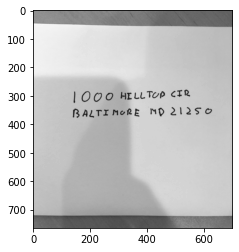

In [178]:
# cv.cvtcolor supprime la dimension couleur de l'image donc image est en noir et blanc
convolImage = cv.filter2D(imgray, -1, box_kernel)
# plt rapplique une couleur de base, pour éviter cela -> cmap='gray'
plt.imshow(convolImage, cmap='gray') 
plt.show() 

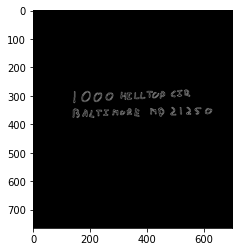

In [179]:
# cv.Canny permet d'appliquer des filtres sur l'image
edges = cv.Canny(convolImage, 400, 255)

# findContour récupère les positions des coutours et les insère dans un tableau
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edges,cmap='gray')
plt.show() 

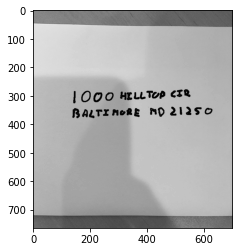

In [180]:
img = cv.drawContours(imgray, contours, -1, (0, 255,75), 2)
plt.imshow(img, cmap='gray')

In [207]:
array = []
ROI_number = 0
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ROI = imgray[y:y+h, x:x+w]
    ROI = cv2.bitwise_not(ROI).astype(numpy.float32)
    ret,ROI = cv.threshold(ROI,127,255,cv.THRESH_BINARY)
    out = np.array([cv.resize(ROI, (28,28))])
    array.append(out.reshape(28,28,1))
    ROI_number += 1


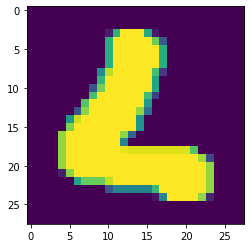

In [203]:
plt.imshow(array[1])

In [204]:
print(type(array[1][0][0][0]))

<class 'numpy.float32'>


In [205]:
print(array[1])

[[[  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]]

 [[  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]]

 [[  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0.      ]
  [  0

[14]
[11]
[19]
[3]
[1]
[0]
[4]
[14]
[0]
[14]
[0]
[18]
[14]
[1]
[25]
[25]
[14]
[14]
[11]
[2]


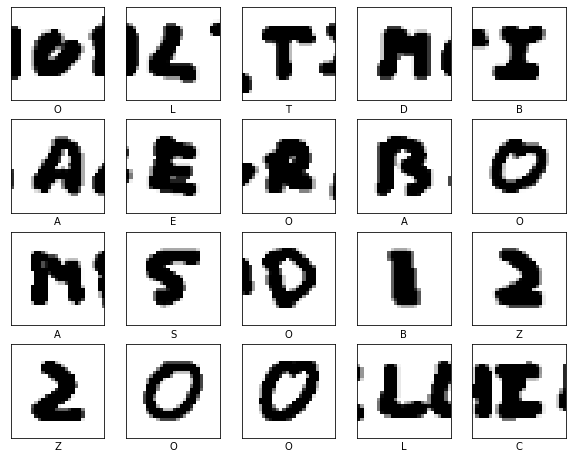

In [208]:
plt.figure(figsize=(10,10))

for i in range(20):
    value = model.predict_classes(array[i].reshape(1,28,28,1))
    print(value)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(array[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[value[0]])
    #print(value[0])
    #print(class_names[value[0]])
    
plt.show()

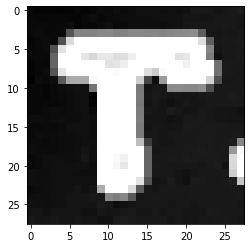

In [123]:
plt.imshow(array[3].reshape(28,28,1), interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [124]:
val = model.predict_classes(array[3].reshape(1,28,28,1))
class_names[val[0]]
print(val)
print(class_names[val[0]])

[22]
W


In [125]:
values = []
for elem in array: 
    values.append(model.predict_classes(elem.reshape(1,28,28,1)))
values

[array([9]),
 array([6]),
 array([20]),
 array([22]),
 array([22]),
 array([20]),
 array([19]),
 array([6]),
 array([20]),
 array([0]),
 array([14]),
 array([3]),
 array([9]),
 array([14]),
 array([20]),
 array([3]),
 array([9]),
 array([14]),
 array([14]),
 array([20]),
 array([15]),
 array([15]),
 array([24]),
 array([2]),
 array([19]),
 array([2]),
 array([20]),
 array([14]),
 array([15]),
 array([20]),
 array([20]),
 array([20])]